<center>

# Physics 481

## Midterm - Laplace Equation

###### Craig Michie, 30001523

</center>
<hr>

Before all, import all packages that may be required

In [1]:
import numpy as np
import scipy
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import itertools

<center>
    
## Introduction

</center>
 
 The Purpose of this midterm is to evaluate the potentials using laplace equations for three different cases. Firstly, a one dimensional laplace equation, this will provide a good introductory to the concepts and techniques to use later on. This task asks for us to determine the laplace equation using two different methods, numerical and analytical solutions and to compare the results. This is accomplished by plotting the analytical solution and increasing increments of steps used in the numerical solution, which is done so we can observe how the accuracy of the numerical solution changes with increasing the step counts and measure the difference as the steps increase in the numerical solution. Secondly, a two dimensional problem, here we are asked to compare the results of a numerical and analytical solution to a infite rectangular box with specified boundary conditions. This task asks us to create a solution for the analytical solution and then the numerical solution for various step counts and then take the difference between them to observe the effects that increasing the step counts has on the accuracy of the numerical solution, like what was done in task one. thirdly, using the techniques we have learned from task one and two obtain a numerical solution for the potential of a conducting cable inbetween two different potentials at two different radii and the determine the potential at radius 3mm.

<center>
    
### Task 1


###### Using Python Solve Laplace equation in 1-Dimension, for V(x=0) = 0 & V(x=1) = 1. Compare Numerical results with analytic solution.

</center>

Laplace equation is a second-order partial differential equation written as:
   
   $$ \nabla^{2}\varphi = 0 $$

Where $\nabla^2$ is the laplace operator (otherwise known as gradient) and $\varphi$ is some scalar function. The solution to this equation are known as harmonic functions, which are very i,portant in the fields of physics, such as electromagnetism.

When in cartesian coordinates is given as:

$$ \frac{\partial^2 V}{\partial x^2} + \frac{\partial^2 V}{\partial y^2} +  \frac{\partial^2 V}{\partial z^2} = 0 $$

Task 1 asks for the laplace in 1 dimension, x, so this equation can be rewritten as:

  $$ \frac{\partial^2 }{\partial x^2} V(x)= 0 $$  
  
  We can see that integrating this twice gives the general solution:
  
  $$ V(x) = a x + b $$
  
  If we only consider discrete locations:

  $$ x_i = i \Delta x $$

then we can approximate the first derivative with centered differences:

  $$ \frac{\partial V}{\partial x}  \approx \frac{V(x_{i+1}) - V(x_{i-1})}{x_{i+1} - x_{i-1}} \approx \frac{V_{i+1} - V_{i-1}}{2 \Delta x} $$ 

and the second derivative as:

$$ \frac{\partial^2 V}{\partial x^2}  \approx  \left . \frac{\partial V}{\partial x} \right |_{x_{i+1}} -  \left . \frac{\partial V}{\partial x} \right |_{x_i}
\approx 
\frac{V_{i+1} - 2V_i + V_{i-1}}{\Delta x^2}
$$
  
Laplace's equation on 1-d grid can then be written as:

 $$  V_i = \frac{V_{i-1} + V_{i+1}}{2} $$
   


To start this task, I will create a function that solves this equation

In [2]:
def OneDimensionNumericalSolver(steps, V):
    '''
    This function solves the laplace equation in 1 Dimension for the numerical solution
    '''
    for value in range(steps):
        '''
        This solves the expressiion for V
        '''
        V[1:-1] = (V[0:-2]+V[2:]) / 2
        
    return V

From the boundary conditions, we can determine what the analytical solution will be. We know that:

$$ V(x) = a x + b $$ 

So setting the boundary points V(x=0) = 0 and V(x=1) = 1, we see that this results in a = 1 and b = 0. This should produce a linear plot.

Now I will use this Solving function to plot solutions to the one dimensional laplace equation, based off different step values and the analytical solution, to be compared later.

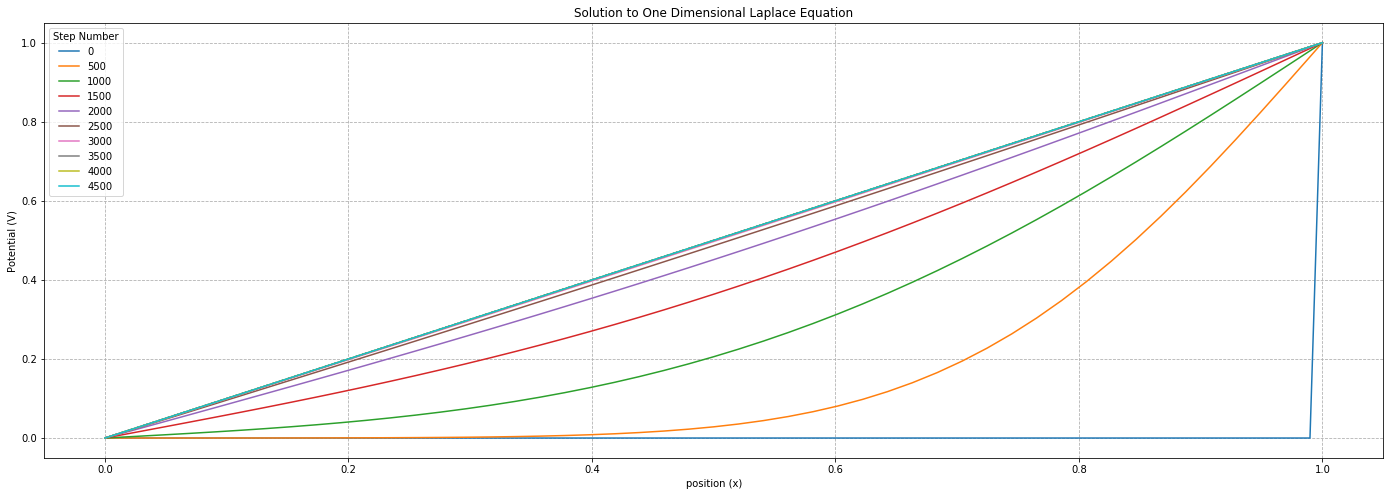

In [3]:
steps = 9999
x = np.linspace(0,1,99)
V = np.zeros(len(x))

#Boundary Conditions 
V[0], V[-1] = 0.0, 1.0

plt.figure(figsize = (24, 8))

plt.plot(x,x, 'k--') #Expected plot 

for value in range(0,5000,500):
    '''
    This loop plots solutions to the one dimensional laplace equation
    based of the step values I want to represent.
    '''
    plt.plot(x,OneDimensionNumericalSolver(value,V),label = str(value))

#Details for the plot        
plt.legend(title = 'Step Number')
plt.xlabel('position (x)')
plt.ylabel('Potential (V)')
plt.title('Solution to One Dimensional Laplace Equation')
plt.grid(linestyle='dashed')


The black dashed plot is the expected linear plot that solves the linear equation:

$$ V(x) = a x + b $$ 

where b = 0 and a = 1, this is evident since it solves the boundary conditions. We see when we increase the number of steps, we get closer to that expected linear plot, we can graph the error associated with each plot.

<Figure size 1728x576 with 0 Axes>

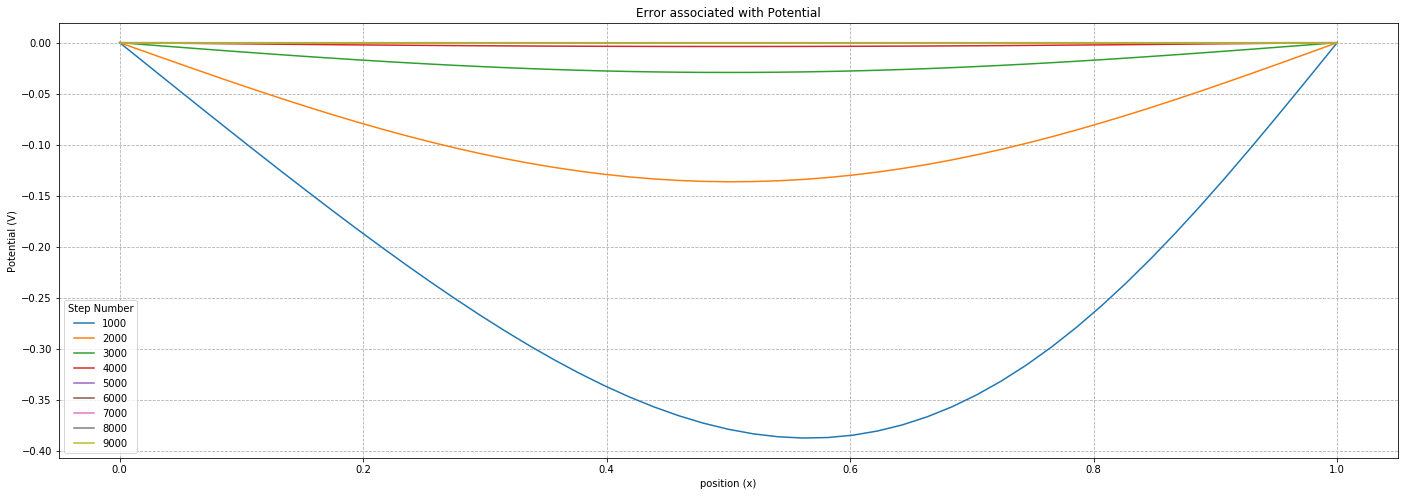

In [4]:
steps = 9999
x = np.linspace(0,1,99)
V = np.zeros(len(x))
plt.figure(figsize = (24, 8))
#Boundary Conditions 
V[0], V[-1] = 0.0, 1.0

plt.figure(figsize = (24, 8))

for value in range(1000,9999,1000):
    '''
    I decided to plot the error associated with 1000 steps up to 9000
    with interval 1000 to obtain a full spectrum of the errors
    '''
    plt.plot(x,(OneDimensionNumericalSolver(value,V)-x),label = str(value))

#Details for the plot        
plt.legend(title = 'Step Number')
plt.xlabel('position (x)')
plt.ylabel('Potential (V)')
plt.title('Error associated with Potential')
plt.grid(linestyle='dashed')
    

From this plot we observe that the more steps the more accurate this solution is to the expected slope and as we increase the number of steps the associated error dissapears at an eponential rate.

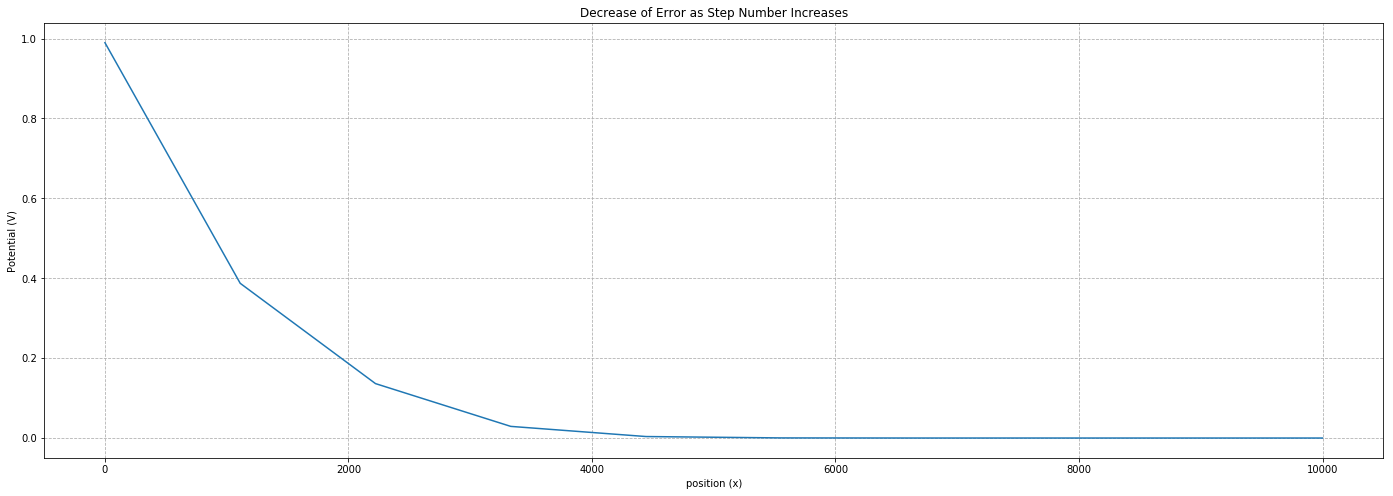

In [5]:
'''
This set of code will determine the rate the error dissapates at, by 
determining the maximum difference of each step plot and the expected plot
to then graph how this value changes 
'''
#Initial Conditions
maximumlist = [] #list to append the maximum values 
steps = 9999
x = np.linspace(0,1,99)
V = np.zeros(len(x))
plt.figure(figsize = (24, 8))
#Boundary Conditions 
V[0], V[-1] = 0.0, 1.0

for value in range(0,9999,1000):
    '''
    This loop acquires the maximum value difference between the step plot and the expected plot 
    and appends them to a list to be plotted
    '''
    maximumvalue = np.amax(abs(OneDimensionNumericalSolver(value,V)-x))
    maximumlist.append(maximumvalue)

#Details for Plot
plt.plot(np.linspace(0,9999,10),maximumlist)

plt.xlabel('position (x)')
plt.ylabel('Potential (V)')
plt.title('Decrease of Error as Step Number Increases')
plt.grid(linestyle='dashed')    


From this plot, it can be confirmed that the error associated with the increase step number, decreases exponentially and can assume around 6000 we have an accurate code for the 1 dimensional laplace equation since the error associated there is really close to 0 and is flat after that point, this allows the code we did to be run up to 6000 steps instead of 9999, to increase the speed of computation.

In [6]:
'''
This set of code tests the times of 6000 steps and 9999 to test if decreasing the steps
to increase the speed of computation is worth the small loss in accuracy
'''
%timeit OneDimensionNumericalSolver(6000, V)
%timeit OneDimensionNumericalSolver(9999, V)

16.1 ms ± 560 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
26.8 ms ± 809 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


We see that the time required in the last 3999 steps approximatly doubles the time for 6000 steps. Due to this it would be more effective to run this code over 6000 steps for an accurate solution to the one dimension laplace equation

<center>
    
### Task 2 


###### Obtain a numerical solution to Laplace's equation in 2D for Griffiths example 3.4 and compare to analytic result
 
 </center>

In two dimensions, Laplace's equation reduces to

  $$\frac{\partial^2 V}{\partial x^2} + \frac{\partial^2 V}{\partial y^2} = 0 $$

We can replace the continous spatial dimensions by a lattice with finite spacing

  $$x_i = i \Delta x $$
  $$y_j = j \Delta y $$

and if $\Delta_x = \Delta_y$ then the potential at each point is given by the average at the four closest adjoining sites

 $$V(x_i, y_j) = V_{i,j} = \frac{V_{i-1,j} + V_{i+1,j} + V_{i,j-1} + V_{i,j+1}}{4} $$

###### From Griffiths example 3.4:


<img src=GriffithsExample.png width=500>

Two infinitely long grounded metal plates lie parallel to the $x-z$ plane, one at $y=0$, the other at $y=a=5~cm$.  They are connected at $x=\pm b=\pm 4~cm$ by metal strips maintained at a constant potential $V_0=4~volts$ to form a rectangular channel.  A thin layer of insulation at each corner allows the sides to be maintained at different potentials.

A solution to this boundary value problem can be obtained through separation of variables

  $$ V(x,y) = \frac{4 V_0}{\pi} \sum_{n=1,3,5,...} \frac{1}{n} \frac{\cosh(n \pi x / a)}{\cosh (n \pi b / a)} \sin(n \pi y / a)$$

In [7]:
V0 = 4
a = 5
b = 4
res = 100

def Bounds(V0, a, b, res):
    '''
    This function returns the boundreis of the problem, so they do not have to be stated repeatedly
    '''
    
    return V0, a, b, res

In [8]:
def Analyltical_Solve(V0 = 4, a = 5, b = 4, res=100):
    '''
    This function calcules the analytical solution of the potential,
    this solution was obtained through seperation of variables.
    '''
    x,y = np.meshgrid(np.linspace(-b,b,res),np.linspace(0,a,res))
    V=0
    for n in range(1,200,2):
        V += (1/n)*(np.cosh(n*np.pi*x/a))*(np.sin(n*np.pi*y/a)*(1/np.cosh(n*np.pi*b/a)))
    return 4*V0*V/(np.pi)
                                           

With this code, it is now possible to plot the analytical solution to then be compared to the numerical solution

Text(0.5,0.92,'Analytical Solution for Potential')

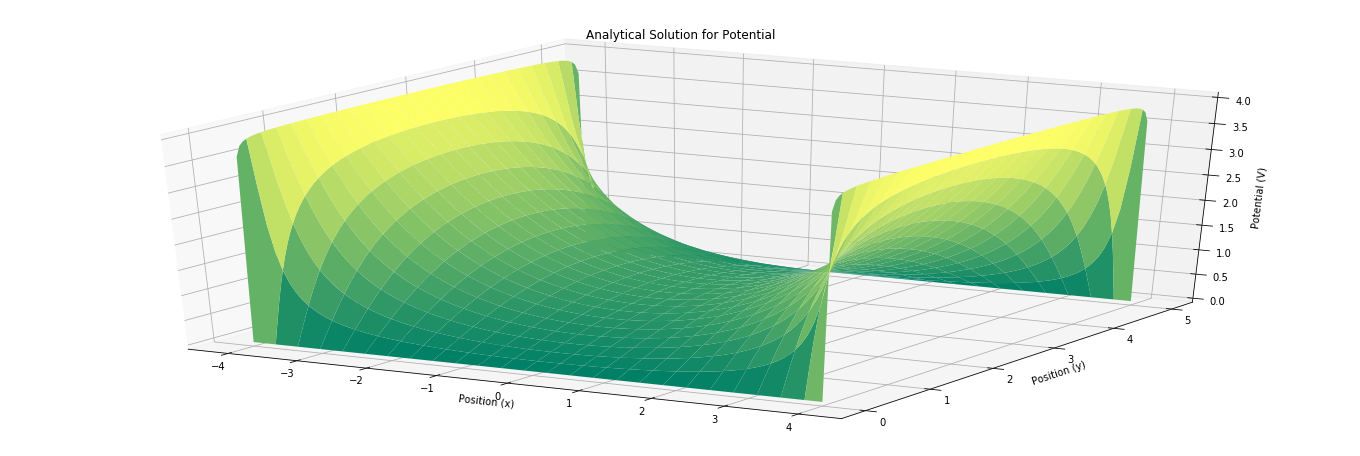

In [39]:
'''
This code creates the 3 dimensional plot
'''
InitCOND = Bounds(V0 = V0, a = a, b = b, res = res)
x,y = np.meshgrid(np.linspace(-b,b,res),np.linspace(0,a,res))
V = 0
z = Analyltical_Solve(V0 = 4, a = 5, b = 4, res = 100) 
fig = plt.figure(figsize = (24,8))
ax = plt.axes(projection = '3d')

ax.plot_surface(x, y, z, rcount=25, ccount=25, cmap = 'summer')
ax.set_ylabel('Position (y)')
ax.set_xlabel('Position (x)')
ax.set_zlabel('Potential (V)')
ax.set_title('Analytical Solution for Potential')

This plot shows that the maximum values of potential occur at the boundaries of the infinite rectangle, and minimum at the center, this is fundementally what is happening so it can be safely assumed that this plot is correct.

Now to plot the numerical plot to compare to this analytical plot, firstly to create a function that evaluates the numerical solution to the laplace equation in 2D.

In [10]:
def Numerical_Solution(steps, V):
    '''
    
    '''
    nx, ny = V.shape
    for value in range(steps):
        
        for i, j in itertools.product(range(1,nx-1),range(1,ny-1)):

            V[i,j] = 0.25*(V[i-1,j]+V[i+1,j]+V[i,j-1]+V[i,j+1]) 
    
    return V

In [11]:
def Get_Z(V0,a,b,steps):
    '''
    This function acquires the potential throughout the space 
    to be used for the plot.
    '''
    V = np.zeros((100,100))
    
    InitCOND = Bounds(V0 = V0, a = a, b = b, res = res)
    
    #Boundary Conditions 
    for x in range(len(V[0])):
        V[0][x] = 0
    for x in range(len(V[a])):
        V[a][x] = 0
    for y in range(len(V[:,b])):
        V[:,0][y] = V0
    for y in range(len(V[:,b])):
        V[:,(-1)][y] = V0
    #Potential in the region of space    
    z = Numerical_Solution(steps=steps, V=V)
    
    return z

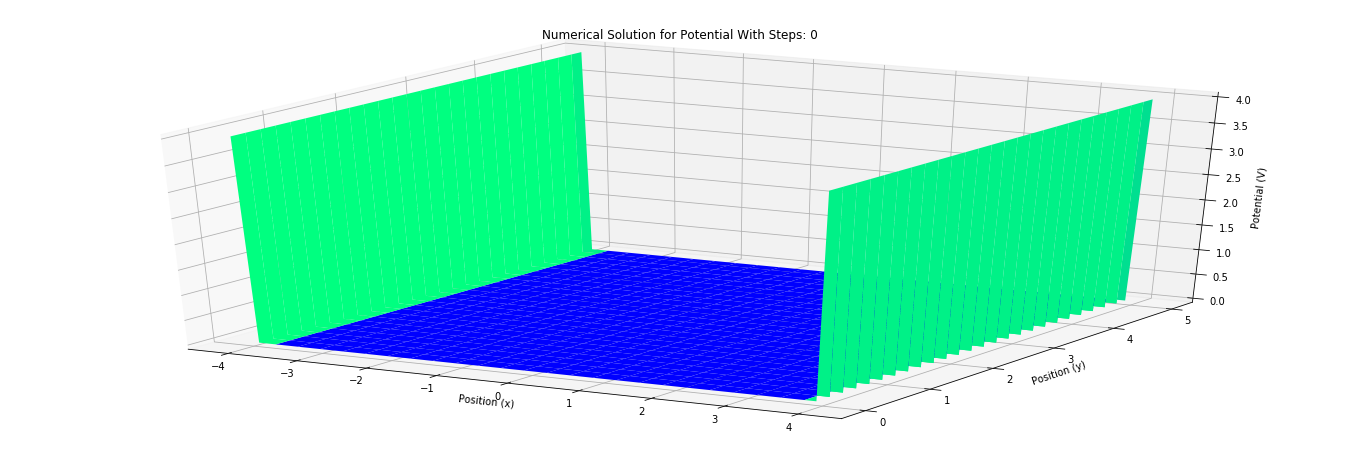

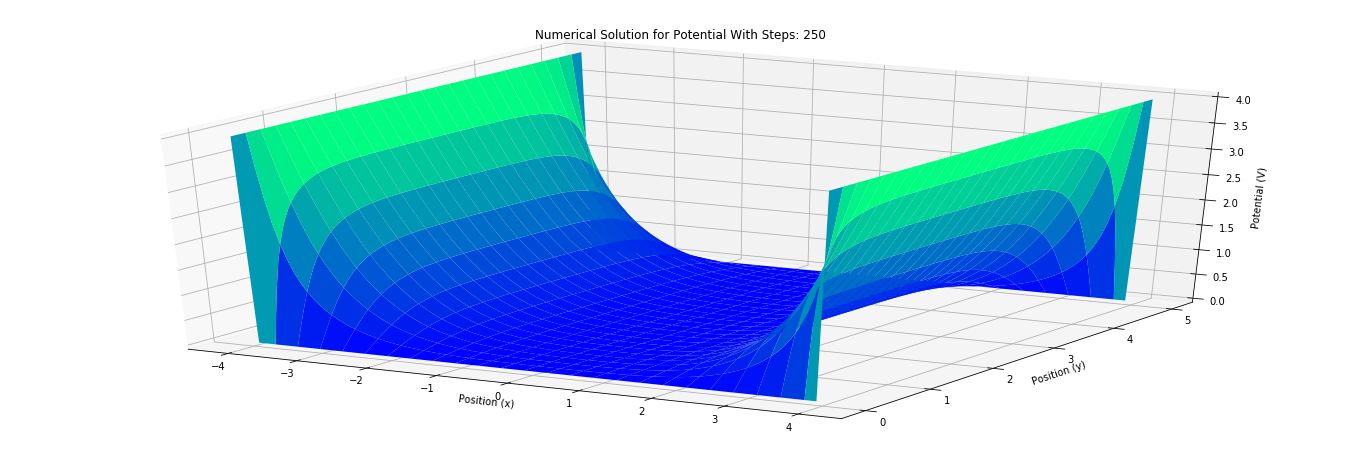

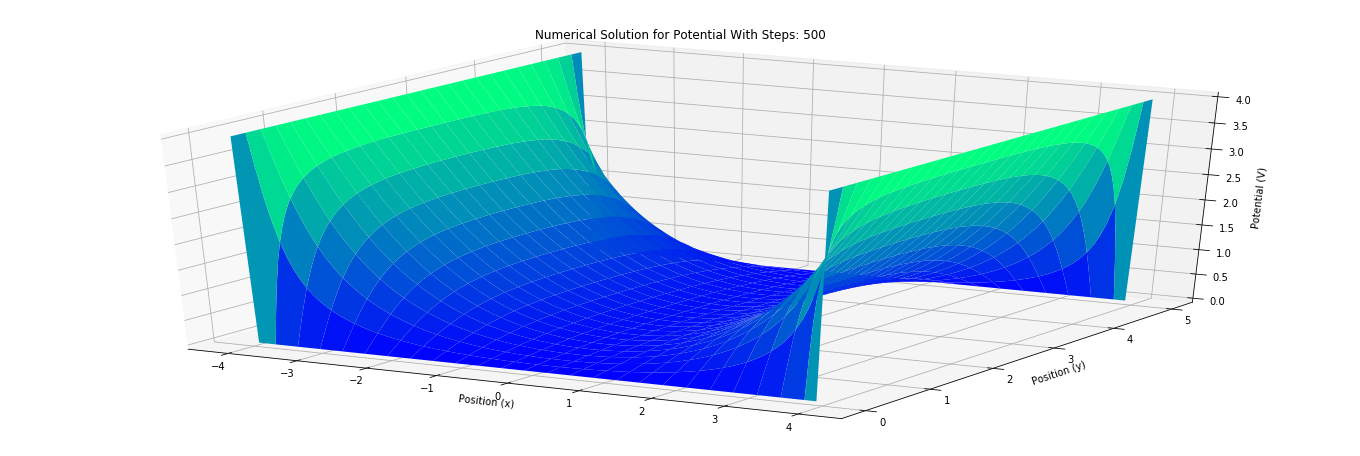

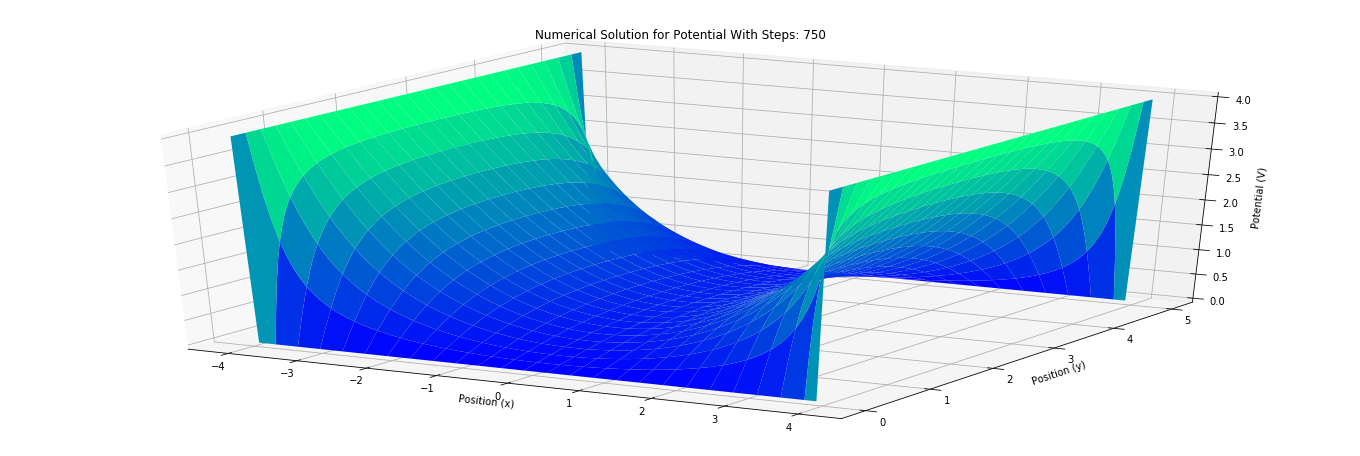

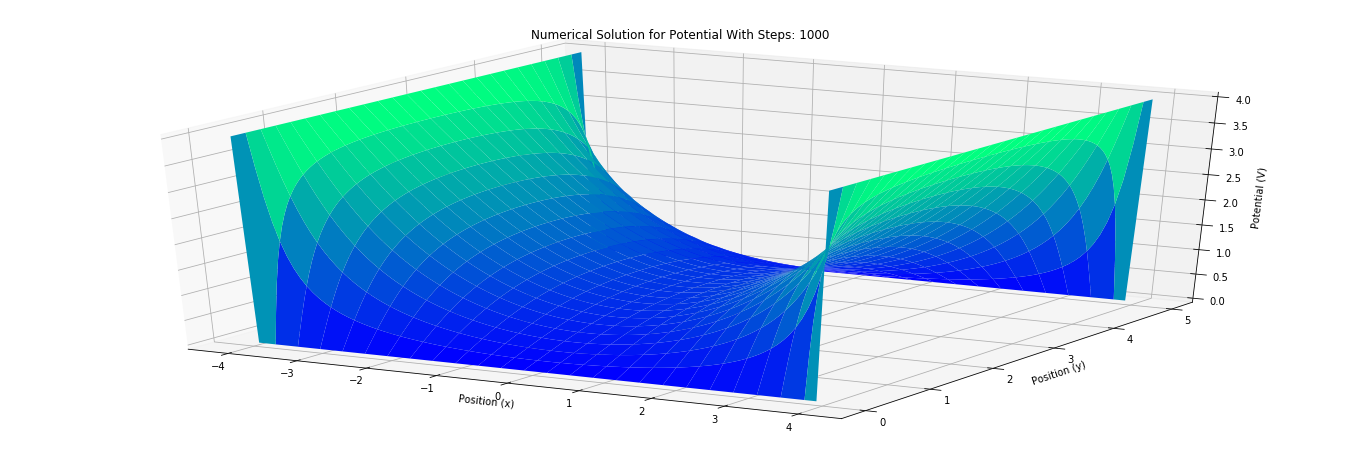

In [29]:
#Initial conditions
InitCOND = Bounds(V0 = V0, a = a, b = b, res = res)
x,y = np.meshgrid(np.linspace(-b,b,100),np.linspace(0,a,100))
V = 0

for n in range(0,1001, 250):
    '''
    The loop evaluates and plots 4 different amount of steps that obtains
    a range of how the increasing of steps affects the plot,this is to get 
    an idea of how the accuracy changes with increasing the amount of steps. 
    '''
    z = Get_Z(V0 = 4, a = 5, b = 4, steps = n) 
    fig = plt.figure(figsize = (24,8))
    ax = plt.axes(projection = '3d')

    #Plotting code
    ax.plot_surface(x, y, z, rcount=25, ccount=25, cmap = 'winter')
    ax.set_ylabel('Position (y)')
    ax.set_xlabel('Position (x)')
    ax.set_zlabel('Potential (V)')
    ax.set_title('Numerical Solution for Potential With Steps: '+ str(n))

These plot shows that the maximum values of potential occur at the boundaries of the infinite rectangle, and minimum at the center, this is fundementally what is happening, these plots also show that the more steps that are involved the more accurate the result becomes as it starts to look like more like the analytical solution plot.

Now let's compare the difference between the two plots by plotting the difference between them.

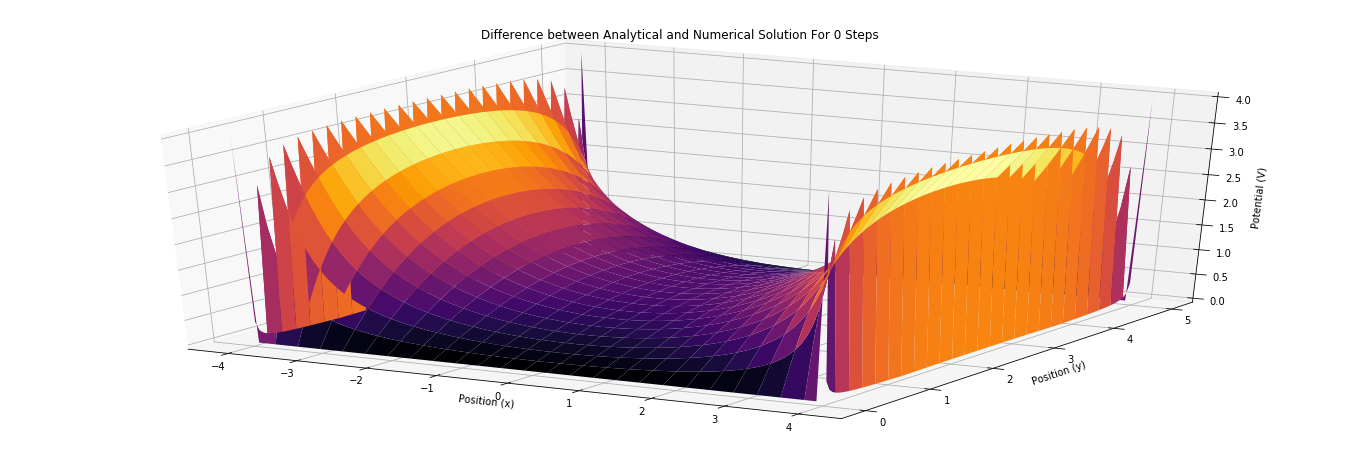

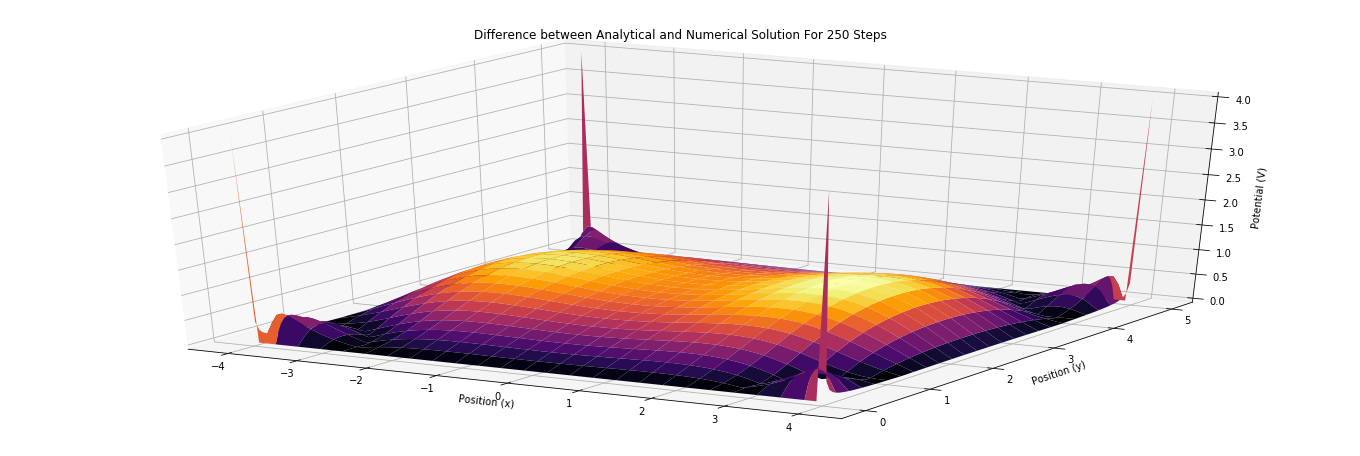

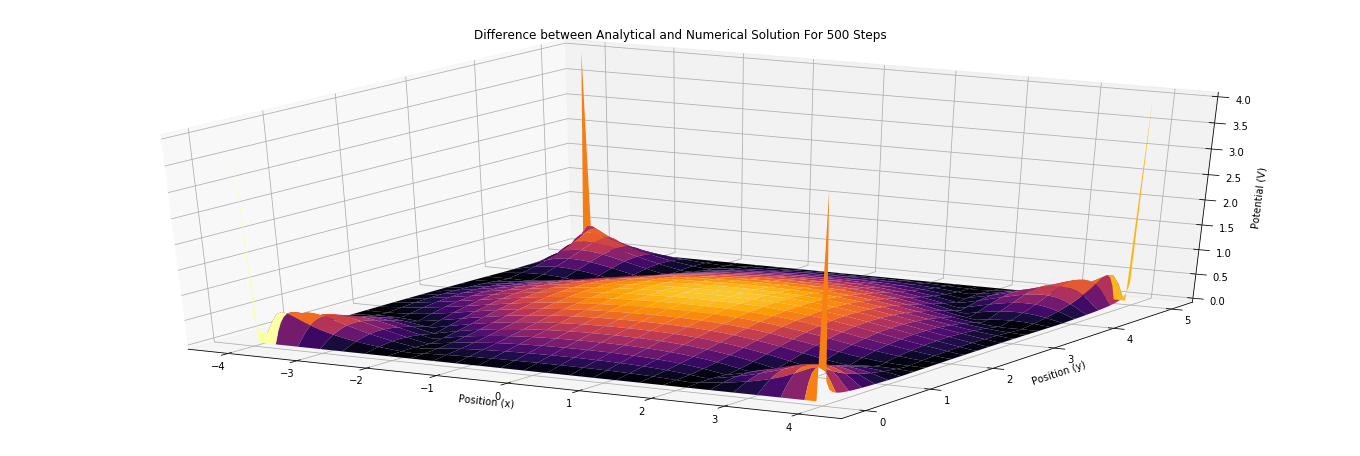

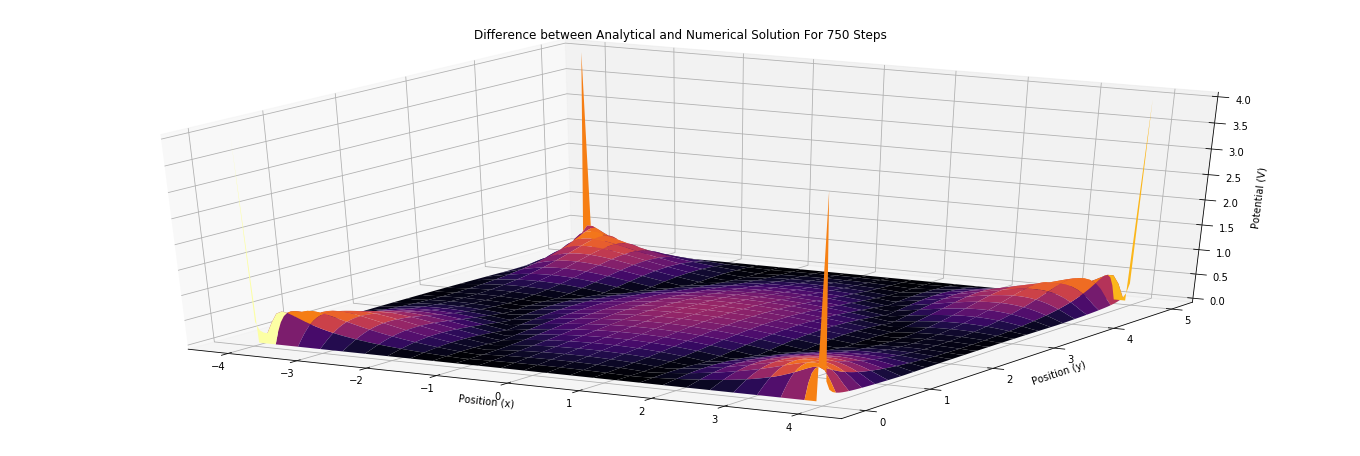

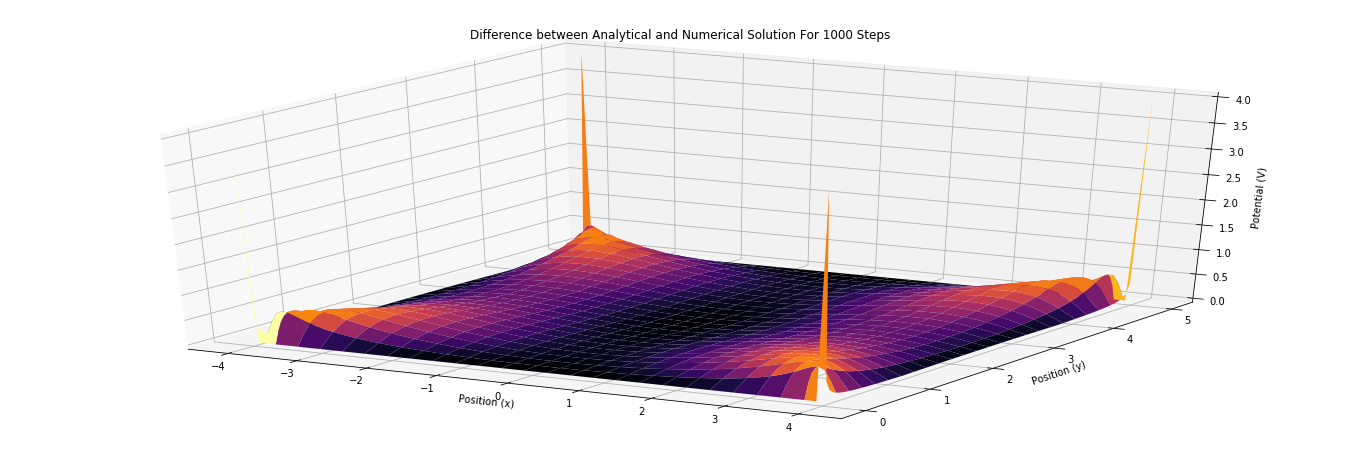

In [31]:
# initial conditions
InitialConditions = Bounds(V0 = V0, a = a, b = b, res = res)
x,y = np.meshgrid(np.linspace(-b,b,res),np.linspace(0,a,res))
V = 0

for fgh in range(0,1001,250):
    '''
    This loop is used to determine the difference between the analytical and 
    numerical solutions for the 5 plots of the numerical solutions of increasing 
    the number of steps, this is done to see the effect of increasing steps
    affects the accuracy of the numerical solution
    '''
    fig = plt.figure(figsize = (24,8))
    ax = plt.axes(projection = '3d')

    #determine the difference between the analytical solution and numerical solution
    g = Analyltical_Solve(V0 = 4, a = 5, b = 4, res = 100) 
    h = Get_Z(V0 = 4, a = 5, b = 4, steps = fgh)
    f = np.abs(g-h)
    
    #plots the difference
    ax.plot_surface(x, y, f, rcount=25, ccount=25, cmap = 'inferno')
    ax.set_ylabel('Position (y)')
    ax.set_xlabel('Position (x)')
    ax.set_zlabel('Potential (V)')
    ax.set_title('Difference between Analytical and Numerical Solution For '+ str(fgh) +' Steps')


Likewise as we saw in the one dimension case, increasing the number of steps increases the accuracy of numerical solution, however for the two dimension case, we can notice that across all five plots at the corners, the difference stays the same, this value of this is 4, which is the value of V0. The reasoning for this can be seen in the code of function "Numerical_Solution" the ranges of i and j are (1,nx-1) and (1,ny-1) this means we never evaluate the potential at these points, so they are given the value 0, which means for the numerical solution there is no evaluation of the potential at those points, thus causing the difference at the corners to be 4 or V0. 

<center>
    
### Task 3 



###### A coaxial cable has inner conductor radius of $r_a=1~mm$ and outer conductor radius of $r_b=5~mm$.  Assume that the outer conductor is grounded and the inner conductor is at potential $V_0=9~volts$. 

###### Obtain a numerical solution to Laplace's equation in the region between the inner and outer conductors.  Plot and discuss.

###### What is the potential midway between the inner and outer conductors (at $r=3~mm$)?  

</center>

This is my determined analytical and numerical solution formulas for this problem in cylindrical coordinates:

<img src=Task3RoughWork.png width=500>



In [14]:
V0 = 9
ra = 1
rb = 5
res = 100

def Boundries(V0, ra, rb, res):
    '''
    Returns the boundries so I don't have to repeatedly state them
    '''
    return V0,ra,rb,res

In [15]:
def Cylindrical_Laplace_Analytical_Solver(s, V0, ra, rb):
    '''
    This function solves the laplace equation in 1 dimension for the analytical solution.
    It takes the initial conditions as parameters, s is the radius, V0 is the potential of 
    inner cable, ra is the radius inner cable and rb is the radius of the outer cable.
    This will be used when it comes to graphing the plot of potential, the difference between
    anayltical and numerical and to determine the potential at r = 3.
    '''
    
    V = -V0/(np.log(rb/ra))*np.log(s)+(V0*np.log(rb)/(np.log(rb/ra)))
    
    return V
    

Text(0.5,0.92,'Potential of the Coaxial Cable')

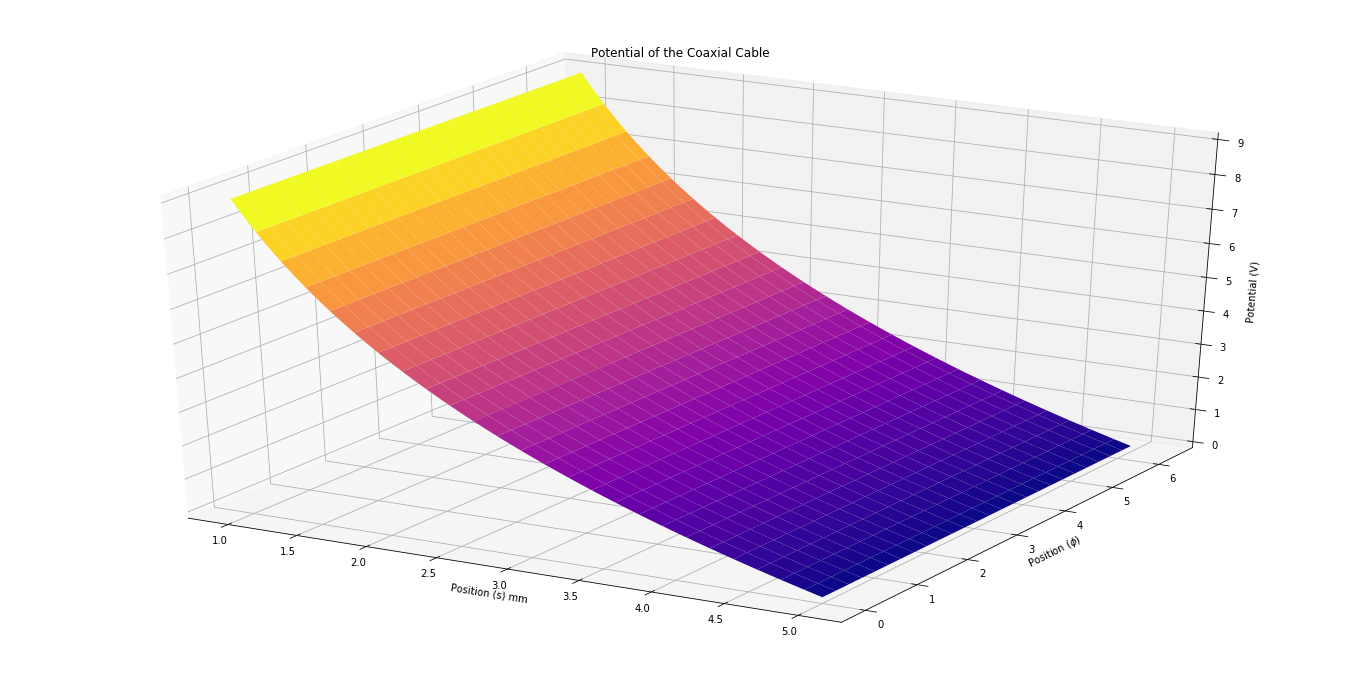

In [16]:
'''
This set of code will plot the analytical solution of the potential between the two radii
'''
#Initial Conditions
InitialConditions = Boundries(V0, ra, rb, res)
s, phi = np.meshgrid(np.linspace(ra,rb,res),np.linspace(0,2*np.pi,res))
V = Cylindrical_Laplace_Analytical_Solver(s,V0,ra,rb)

#Plot of Potential
fig = plt.figure(figsize = (24,12))
ax = plt.axes(projection = '3d')
ax.plot_surface(s,phi, V, rcount = 25, ccount = 25, cmap = 'plasma')
ax.set_xlabel('Position (s) mm')
ax.set_ylabel('Position ($\phi$)')
ax.set_zlabel('Potential (V)')
ax.set_title('Potential of the Coaxial Cable')


We already determined that the potential has no $\phi$ dependence, so we can plot this as a one dimensional plot, of potential as S increases

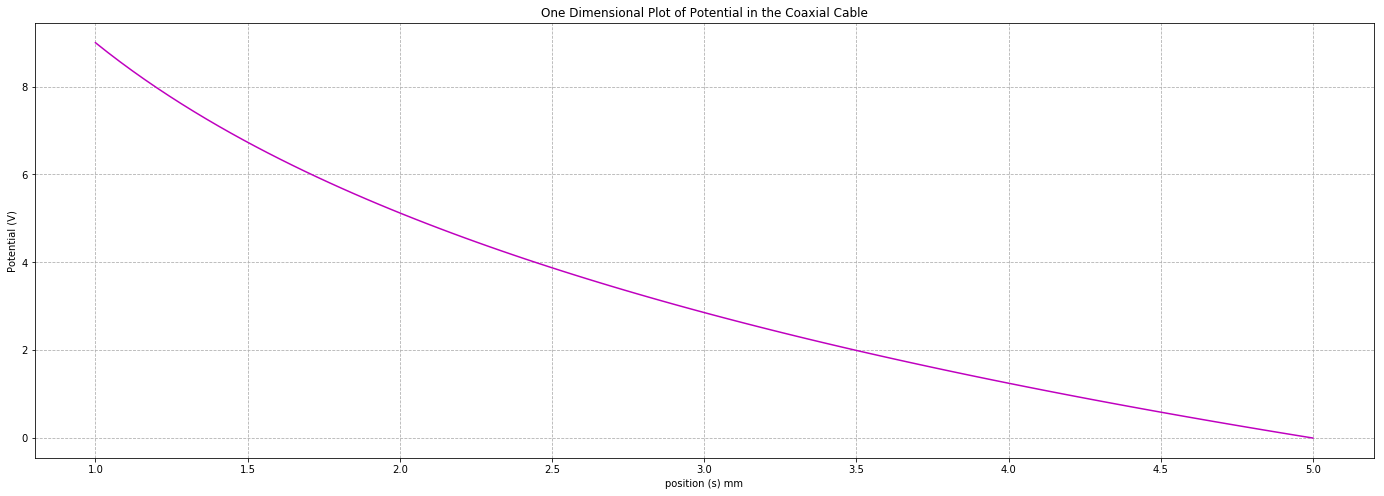

In [17]:
#Initial Conditions
InitialConditions = Boundries(V0, ra, rb, res)
s = np.linspace(ra,rb,res)

#One Dimensional Plot of Potential
plt.figure(figsize = (24, 8))

plt.plot(s,Cylindrical_Laplace_Analytical_Solver(s,V0,ra,rb),'m')
plt.xlabel('position (s) mm')
plt.ylabel('Potential (V)')
plt.title('One Dimensional Plot of Potential in the Coaxial Cable')
plt.grid(linestyle='dashed')

Now to plot the numerical solution. This is done by using the determined solution for the cable to write a function that solves this equation using steps and then using this function, plot the equation. To be used to take the difference between these plots. Since there is no $\phi$ dependence, I will produce these plots in the one dimensional plot.

In [18]:
def Numerical_Cylindrical_Solution(steps, V0, ra, rb, res):
    '''
    This function evaluates the numerical/Relaxed solution
    with s dependence
    '''
    #Initial Conditions
    InitialConditions = Boundries(V0, ra, rb, res)
    v = np.zeros(res)
    v[0]=V0
    v[-1]=0
    r = np.linspace(ra,rb,res)
    ds = r[1]-r[0]
    
    for value in range(steps):
        '''
        This loop will evauluate the numerical solution 
        '''
        for indx in np.arange(1,res-1):
            
            v[indx] = (v[indx+1]-v[indx-1])*(ds/(4*r[indx]))+((v[indx+1]+v[indx-1])/2)
    return v

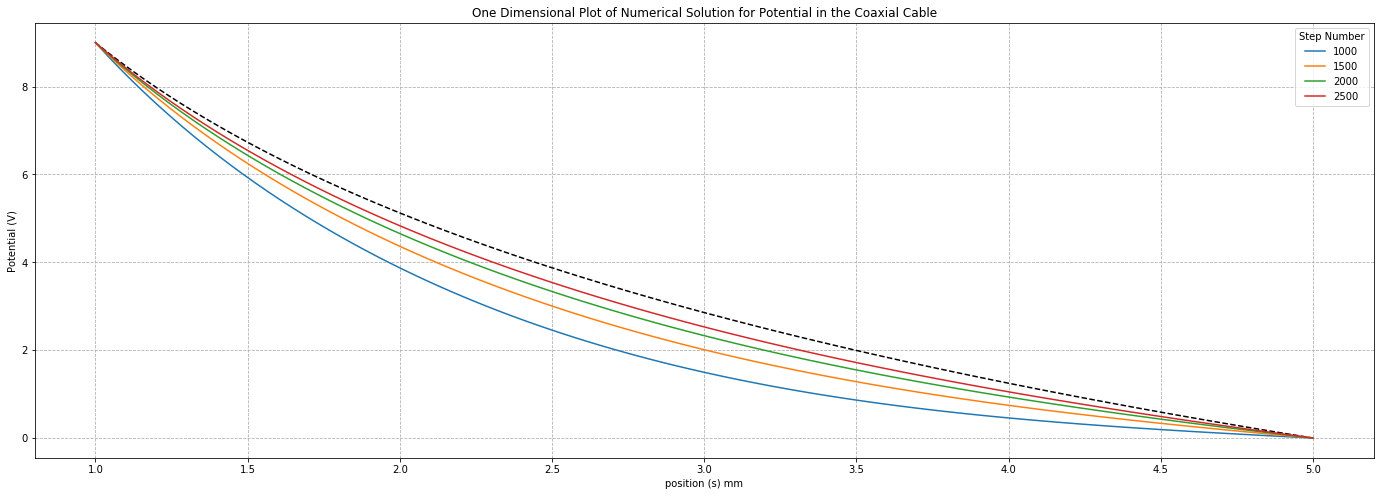

In [19]:
'''
This code plots the One Dimension case of the potential 
between the two conductors
'''
#Initial Conditions
InitialConditions = Boundries(V0, ra, rb, res)
v = 0
r = np.linspace(ra,rb,res)
ds = r[1]-r[0]
plt.figure(figsize = (24, 8))

#Analytical Solution plot, plotted for comparison
plt.plot(s,Cylindrical_Laplace_Analytical_Solver(s,V0,ra,rb),'k--')

#Produces plots of increasing steps of the numerical solution
for n in range(1000,3000,500):
    
    V = Numerical_Cylindrical_Solution(n,V0,ra,rb,res)
    plt.plot(s,V, label = str(n))
    plt.legend(title = 'Step Number')
    plt.xlabel('position (s) mm')
    plt.ylabel('Potential (V)')
    plt.title('One Dimensional Plot of Numerical Solution for Potential in the Coaxial Cable')
    plt.grid(linestyle='dashed')


From this plot we can observe that like the analytical solution, the plot is logarithmic and similarly to task 1 and 2, increasing steps increases the accuracy of the numerical solution.

To calculate the potential at s = 3mm, simply put s = 3 into the functions for the analytical solution and numerical solution, for accuracy of the numerical solution I will use 5000 steps. 

From the plot above, the predicted solution for potential at s = 3 should be around 2.75 V (Visual guess), although there will be a disperency between the numerical solution and the analytical solution, since the numerical solution is an approximation.

In [20]:
#Initial Conditions
InitialConditions = Boundries(V0, ra, rb, res)
s = 3
steps = 5000


print('The Analytical Solution for the Potential at s=3 is: '+ str('%0.4f'%Cylindrical_Laplace_Analytical_Solver(s, V0, ra, rb)))

'''
To determine the potential at s = 3 for the numerical solution, we have to remember that the numerical
solution returns a list, so to obtain a value at s = 3, we have to first determine where s = 3 occurs in the list.
we know that s = 3 occurs half way so the value at position 50 in the list should be the evaluation of the 
numerical solution at s = 3
'''
V = Numerical_Cylindrical_Solution(n,V0,ra,rb,res)
r3 = res//2 #or 50

print('The Numerical Solution for the Potential at s=3 is: ' + str('%0.4f'%V[r3]))

The Analytical Solution for the Potential at s=3 is: 2.8565
The Numerical Solution for the Potential at s=3 is: 2.4936


We see that the analytical solution is 2.8565 and the numerical solution is 2.4936. These values are quiet different even when evaluating after 5000 steps, which as we saw in the plot of numerical solutions with increasing steps should be very accurate to the analytical solution. To investigate what could be the cause of this I will look at the list of the potentials of the numerical solution with 5000 steps.

In [21]:
print(V)

[9.         8.75991772 8.52901619 8.30663922 8.09220082 7.88517555
 7.6850905  7.49151851 7.30407247 7.12240047 6.94618167 6.7751227
 6.60895466 6.44743043 6.29032235 6.13742025 5.98852968 5.84347031
 5.70207465 5.56418678 5.42966129 5.29836235 5.17016286 5.04494366
 4.92259289 4.80300536 4.68608199 4.57172934 4.45985915 4.35038792
 4.24323657 4.1383301  4.03559725 3.93497029 3.83638468 3.73977893
 3.64509432 3.55227474 3.46126649 3.37201815 3.28448039 3.19860585
 3.114349   3.03166607 2.95051486 2.8708547  2.79264635 2.71585189
 2.64043465 2.56635914 2.493591   2.42209688 2.35184445 2.28280229
 2.21493988 2.14822751 2.08263627 2.01813801 1.95470528 1.89231129
 1.83092991 1.77053561 1.71110345 1.65260905 1.59502853 1.53833856
 1.48251626 1.42753924 1.37338555 1.32003366 1.26746247 1.21565127
 1.16457974 1.11422795 1.06457629 1.01560555 0.96729682 0.91963156
 0.87259151 0.82615877 0.78031573 0.73504506 0.69032976 0.6461531
 0.60249866 0.55935026 0.51669203 0.47450836 0.43278393 0.391503

From this list, we see that the midpoint is 2.493591 (the 50th spot), however looking at this list we observe that the value at the 45th spot is the closest value to the analytical solution at s = 3.  

In [22]:
print('%0.4f'%V[45])

2.8709


From this list, we can see that the numerical solution possibly isn't evaluating at evenly spaced intervals causing the evaluation of s = 3 (midpoint) occuring slightly before the midpoint in the list, due to this phenomenon, I would not use the numerical solution to evaluate the potential at specific points, since there is this disperency between when a position should occur in the list and when it actually does. However, for determining the general behaviour of a potential the numerical solution is a good method to use.

<center>
    
### Conclusion 

</center>


In task 1, we were asked to plot and comment on the numerical/relaxed solution of the laplace equation. By plotting the analytical solution, numerical solution and the difference, we saw the behaviour of the numerical solution as more steps were performed. This behavior is that increasing the steps increases the accuracy of the numerical solution, which was shown in the difference plot. Then I plotted the error associated with increasing the steps which showed to decrease exponentially and determined that around 6000 steps the numerical solution should produce accurate enough results when compared with the analytical solution.

In task 2, we were asked to plot and compare the numerical solution to the analytical solution, this was done by performing a similar method to the one dimension case. Likewise to task 1, after plotting the numerical solution we observed that increasing the steps increases the accuracy of the numerical solution.

In task 3, we were asked to determine a numerical solution for a coaxial cable consisting of two conductors one with a smaller radius that had a potential and the other did not, and determine the potential at s = 3 (midway between the 2 conductors). To determine the accuracy of my numerical solution, I first plotted the analytical solution to see how the numerical solution should look like. After determining the numerical solution, I plotted it like before in task 1 and 2. Like the analytical solution, it was also logarithmic and likewise to task 1 and 2, it was observed that increasing the number of steps increases the accuracy of the numerical solution. The problem came when determining the potential at s = 3, it was expected to be at the midpoint in the list generated by the numerical solution, which was not the case as it was slightly before that point. From task 1, I determined that when steps is around 6000 the numerical solution should be accurate with the analytical solution, so it was not a problem with a lack of steps performed. So I believe this is caused by the numerical solution not perfoming equally spaced evaluations between 1 and 5 mm, causing the measurement of s = 3 to occur at the 45th evaluation and not the 50th (since the resolution was 100). If this was performed with intervals of 0.04, then the measurement of s = 3 would've occured in the 50th spot on the produced list of the potential. Due to this, I wouldn't use my numerical solution to determine the potential at exact points since I ended up comparing the results from the list of the numerical solution to the analytical solution value, so without the knowledge of the analytical solution, I couldn't determine the correct value of potential. However, the plot of the numerical solution, is accurate and can be used to observe the general behaviour of a potential in a given system.